# Linear Regression On Boston House Price Prediction  

## [ CONTENTS ] 

1. About the dataset<br>
2. Objective<br>
3. Loading the data<br>
4. Data Preprocessing <br>
5. Linear Regression<br>
6. LR using Gradient Descent<br>
7. LR using Stochastic Gradient Descent<br>
8. Conclusion<br>

## 1. About the dataset
1. Title: Boston House Prices dataset. Link: http://archive.ics.uci.edu/ml/datasets/Housing<br>
<br>
2. Relevant Information: This dataset was taken from the StatLib library which is maintained at Carnegie Mellon University.The Boston house-price data of Harrison, D. and Rubinfeld, D.L. 'Hedonicprices and the demand for clean air', J. Environ. Economics & Management,vol.5, 81-102, 1978.   Used in Belsley, Kuh & Welsch, 'Regression diagnostics..', Wiley, 1980.   N.B. Various transformations are used in the table on pages 244-261 of the latter. The Boston house-price data has been used in many machine learning papers that address regression problems.<br>
<br>
3. Data includes:
    *Number of Instances: 506<br>
    *Number of Attributes: 13 numeric/categorical predictive<br>
    *Median Value (attribute 14) is usually the target<br>
<br>
4. Attribute Information: 
    * CRIM     per capita crime rate by town
    * ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
    * INDUS    proportion of non-retail business acres per town
    * CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
    * NOX      nitric oxides concentration (parts per 10 million)
    * RM       average number of rooms per dwelling
    * AGE      proportion of owner-occupied units built prior to 1940
    * DIS      weighted distances to five Boston employment centres
    * RAD      index of accessibility to radial highways
    * TAX      full-value property-tax rate per tenthousand dollar
    * PTRATIO  pupil-teacher ratio by town
    * B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
    * LSTAT    % lower status of the population
    * MEDV     Median value of owner-occupied homes in $1000's

## 2. Objective:
We are given Boston House Price dataset where we need to predict house price for a given set of attributes. So, this is a regression problem and we will use linear-regression to predict the house prices.<br>
Apart from that we will implement linear regression using both gradient descent optimizer and stochastic gradient descent(SGD) optimizer and will compare their performance.

In [39]:
# importing required library 
import time
import math
import numpy as np 
import pandas as pd
import seaborn as sns
from random import shuffle
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import train_test_split

In [2]:
# Standardizing the data
def standardizer(data):
    stnd_scaler = StandardScaler(with_mean=False)
    stnd_matx = stnd_scaler.fit_transform(data)
    return stnd_matx

## 3. Loading the data

In [3]:
# loading the data
boston = load_boston()

In [4]:
boston.data.shape

(506, 13)

In [5]:
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


## 4. Data Preprocessing

In [6]:
# converting data to data-frame
data = pd.DataFrame(boston.data, columns=boston.feature_names)

In [7]:
y = pd.DataFrame(boston.target, columns=['Price'])

In [8]:
# data spliting into train and test 
def data_split(data, y):
    x_train, x_test, y_train, y_test = train_test_split(data, y, test_size = 0.33, random_state = 5)
    return x_train, x_test, y_train, y_test

## 5. Linear Regression 

In [9]:
# calculates root-mean-square error 
def rms_error(true_y, yhat):
    pred_err = np.sum(np.square(yhat - true_y))
    return math.sqrt(pred_err / float(len(true_y)))

In [10]:
# linear regression using sklearn 
def linear_regn(data, y):
    train_x, test_x, train_y, test_y = data_split(data, np.array(y))
    regression = LinearRegression(n_jobs = 8)
    regression.fit(train_x, train_y)
    y_pred = regression.predict(test_x)
    error = rms_error(test_y, y_pred)
    return error, test_y, y_pred 

In [11]:
# plots test y vs yhat(predicted y)
def plot_yyhat(true_y, yhat):
    plt.scatter(list(true_y), list(yhat.T))
    plt.xlabel("Prices: $Y_i$")
    plt.ylabel("Predicted prices: $\hat{Y}_i$")
    plt.title("Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$")
    plt.show()

In [12]:
# plot the spread of difference between true price and predicted price
def error_spread(true_y, yhat):
    delta = (true_y - yhat).T
    sns.set_style('darkgrid')
    plt.title("Density Plot Of Error")
    plt.xlabel("Amount of Error")
    plt.ylabel("Frequency")
    sns.kdeplot(np.squeeze(np.asarray(delta)))
    plt.show()

In [13]:
# calculates test error 
def test_error(coefs, intercept):
    train_x, test_x, train_y, test_y = data_split(data, np.array(y))
    yhat = np.dot(coefs, test_x.T) + intercept
    test_err = rms_error(test_y, yhat.T)
    return test_err, test_y, yhat

In [14]:
# applying linear regression on the data
error, test_y, yhat = linear_regn(standardizer(data), y)

In [15]:
print("The Root-Mean-Square error for test-set is: ",error)

The Root-Mean-Square error for test-set is:  5.342412121468944


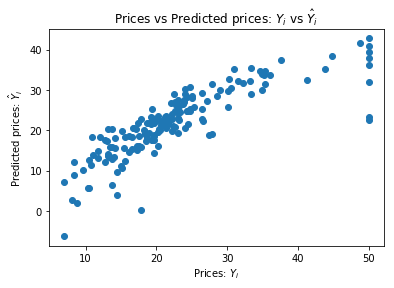

In [16]:
# true price vs predicted price 
plot_yyhat(test_y, yhat)

#### Observation:
* we are getting linear points nearly on Y = X line which indicates that our regression model has done pretty good work.

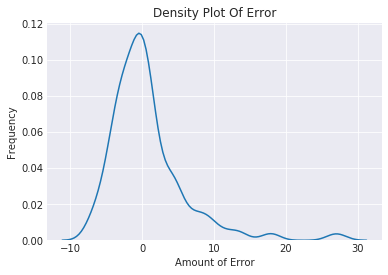

In [17]:
# spread of differnece between true price and predicted price 
error_spread(test_y, yhat)

#### Observation:
* We are getting error = 0 for most of the points. But there are some large errors like 10 onwards.
* On the left-side also we are not getting stiff slope.

## 6. Linear Regression using Gradient Descent

In [18]:
# gradient descent vectorized implementation
def step_gradient(m_current, data, y, learningRate):
    m_gradient = np.zeros((data.shape[1],1))
    N = float(data.shape[0])
    m_gradient += -(2/N) * np.dot(data.T,(y - (np.dot(m_current.T,data.T).T)))
    new_m = m_current - (learningRate * m_gradient)
    return new_m

def gradient_descent_runner(data, y, initial_m, learning_rate, epochs): 
    m = initial_m
    for i in range(epochs):
        m = step_gradient(m, data, y, learning_rate)
    return m

In [19]:
# test error 
def test_error_gd(coefs):
    train_x, test_x, train_y, test_y = data_split(np.matrix(data), np.array(y))
    yhat = np.dot(np.array(coefs.T), test_x.T)
    test_err = rms_error(test_y, yhat.T)
    return test_err, yhat

In [20]:
# standardizing data
data = pd.DataFrame(standardizer(data))

In [21]:
# adding a column of ones to the data for the intercept(b)
data['bias'] = pd.Series(np.ones(data.shape[0]))

In [22]:
# data spliting 
train_x, test_x, train_y, test_y = data_split(np.matrix(data), np.array(y))

In [23]:
# initializing the coeffs
initial_m = np.zeros((data.shape[1],1))

In [24]:
# appling linear regression with gradient descent
tic = time.time()
m = gradient_descent_runner((np.matrix(train_x)), train_y, initial_m, 0.000003, 1000000)
toc = time.time()
print("Exection Time: ", toc - tic)

Exection Time:  18.896047592163086


In [25]:
# printing the coeffs
m

array([[-1.16860116],
       [ 0.68109262],
       [-0.47530586],
       [ 0.264186  ],
       [ 0.10089593],
       [ 4.08584611],
       [-0.41563871],
       [-1.61882411],
       [ 0.66471894],
       [-0.56408022],
       [-1.20214404],
       [ 1.41418808],
       [-2.7998489 ],
       [ 0.37495514]])

In [26]:
# calculate the test error
err, yout = test_error_gd(m)

In [27]:
print("The Root-Mean-Square error for test-set is: ", err)

The Root-Mean-Square error for test-set is:  5.616953159742184


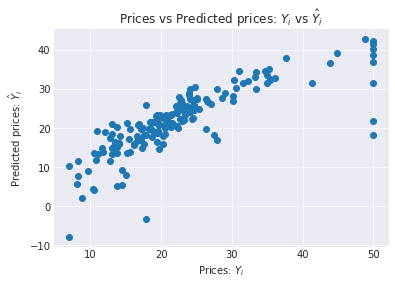

In [28]:
# true price vs predicted price 
plot_yyhat(test_y, yout)

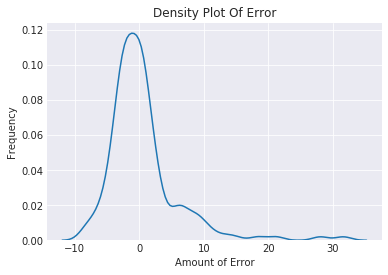

In [29]:
# spread of differnece between true price and predicted price 
error_spread(test_y, yout.T)

#### Observation:
* We got very close result to the sklearn implementation.

## 7. Linear Regression using Stochastic Gradient Descent(SGD)

In [30]:
# linear regression using SGD
def step_gradient_sgd(m_current, data, y, learningRate):
    # K(random number of samples)
    k = np.random.randint(1,data.shape[0])
    shuff = [i for i in range(data.shape[0])]
    shuffle(shuff)
    # shuffling the data
    data_shuff  = data[shuff]
    y_shuff = y[shuff]
    m_gradient = np.zeros((data.shape[1],1))
    N = float(k)
    m_gradient += -(2/N) * np.dot(data_shuff[:k,:].T,(y_shuff[:k] - (np.dot(m_current.T,data_shuff[:k].T).T)))
    new_m = m_current - (learningRate * m_gradient)
    return new_m

def gradient_descent_runner_sgd(data, y, initial_m, learning_rate, epochs): 
    m = initial_m
    for i in range(epochs):
        m = step_gradient_sgd(m, data, y, learning_rate)
    return m

In [31]:
# test-error
def test_error_sgd(coefs):
    train_x, test_x, train_y, test_y = data_split(np.matrix(data), np.array(y))
    yhat = np.dot(np.array(coefs.T), test_x.T)
    test_err = rms_error(test_y, yhat.T)
    return test_err, yhat

In [32]:
# initializing the coeffs
initial_m = np.zeros((data.shape[1],1))

In [33]:
# applying linear regression using SGD
tic = time.time()
m_sgd = gradient_descent_runner((np.matrix(train_x)), train_y, initial_m, 0.000003, 1000000)
toc = time.time()
print("Execution Time: ", toc - tic)

Execution Time:  19.55647039413452


In [34]:
# calculated coeffs
m_sgd

array([[-1.16860116],
       [ 0.68109262],
       [-0.47530586],
       [ 0.264186  ],
       [ 0.10089593],
       [ 4.08584611],
       [-0.41563871],
       [-1.61882411],
       [ 0.66471894],
       [-0.56408022],
       [-1.20214404],
       [ 1.41418808],
       [-2.7998489 ],
       [ 0.37495514]])

In [35]:
# test error
err, yout = test_error_sgd(m_sgd)

In [36]:
print("The Root-Mean-Square error for test-set is: ",err)

The Root-Mean-Square error for test-set is:  5.616953159742184


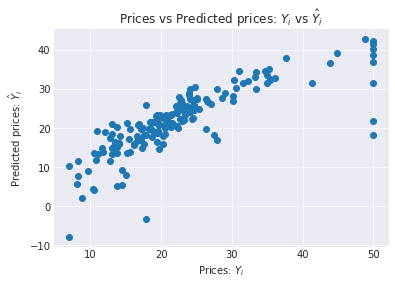

In [37]:
# true price vs predicted price 
plot_yyhat(test_y, yout)

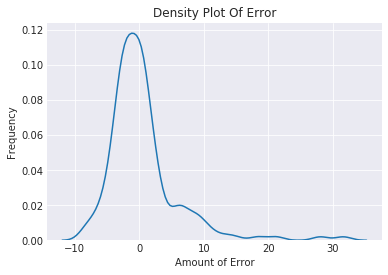

In [38]:
# spread of differnece between true price and predicted price 
error_spread(test_y, yout.T)

#### Observation:
* We got very close result to both sklearn implementation and gradient descent implementation.

## 8. Conclusion:
* Both gradient descent and stochastic gradient descent performed very good as they are very close to the sklearn implementaion.
* For 10 million epochs both gradient descent and SGD took nearly same run-time for 339(size of train-set) data points. But SGD will out-perform in terms of run-time for very large amount of data.